In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
url1 = 'https://raw.githubusercontent.com/Janetle-hi/Movie-Recommendation/master/data/links_small.csv'
movies = pd.read_csv(url1, sep = ',')

In [0]:
movies.head(5)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [0]:
import requests
from io import StringIO

orig_url='hhttps://drive.google.com/file/d/1KqPNNcwXT7C1Uutp9QWEdaTKN7iE5WHb/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
metadata = pd.read_csv(csv_raw)
metadata.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [0]:
url3 = 'https://raw.githubusercontent.com/Janetle-hi/Movie-Recommendation/master/data/ratings_small.csv'
ratings = pd.read_csv(url3, sep = ',')
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [0]:
ratings.nunique()

userId         671
movieId       9066
rating          10
timestamp    78141
dtype: int64

In [0]:
# rename tmdbId to id 
movies = movies.rename(columns={'tmdbId':'id'})
movies

,movieId,imdbId,id
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9120,162672,3859980,402672.0
9121,163056,4262980,315011.0
9122,163949,2531318,391698.0
9123,164977,27660,137608.0


In [0]:
# convert id to numeric 
metadata.id = pd.to_numeric(metadata.id, errors='coerce')

In [0]:
# Merge movies and metadata 
df = movies.merge(metadata, how='inner', on='id')

np.transpose(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9098,9099,9100,9101,9102,9103,9104,9105,9106,9107,9108,9109,9110,9111,9112,9113,9114,9115,9116,9117,9118,9119,9120,9121,9122,9123,9124,9125,9126,9127,9128,9129,9130,9131,9132,9133,9134,9135,9136,9137
movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,...,156609,156726,157200,157296,157407,157667,158238,158314,158528,158783,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,160954,161084,161155,161336,161582,161594,161830,161918,161944,162542,162672,163056,163949
imdbId,114709,113497,113228,114885,113041,113277,114319,112302,114576,113189,112346,112896,112453,113987,112760,112641,114388,113101,112281,113845,113161,112722,112401,114168,113627,114057,114011,114117,112682,115012,112792,114746,112431,112637,112818,112286,113442,112697,112749,114279,...,4438848,5022702,2241351,2277860,3212232,4824302,3799694,1054478,4052882,4016934,2667380,3110958,155350,3949660,3960412,3065204,2674430,1289401,1489889,4196776,2263814,918940,4094724,2823054,2751904,1639084,5613056,3531824,4465220,5794766,5278462,2582782,5595168,3732950,4831420,255313,5165344,3859980,4262980,2531318
id,862,8844,15602,31357,11862,949,11860,45325,9091,710,9087,12110,21032,10858,1408,524,4584,5,9273,11517,8012,1710,9691,12665,451,16420,9263,17015,902,37557,9909,63,9598,47018,687,139405,33689,9603,34615,31174,...,325133,376570,303858,127380,332411,353069,290250,108176,332567,290098,384798,291805,26677,308531,341012,259693,328429,43074,302699,324668,278348,258489,316727,316023,177869,353571,399106,328387,368620,401387,373348,338766,390734,314420,390989,159550,392572,402672,315011,391698
adult,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,NaN,NaN,NaN,"{'id': 645, 'name': 'James Bond Collection', '...",NaN,NaN,"{'id': 117693, 'name': 'Balto Collection', 'po...",NaN,NaN,NaN,NaN,NaN,"{'id': 3167, 'name': 'Ace Ventura Collection',...",NaN,"{'id': 91698, 'name': 'Chili Palmer Collection...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'id': 9435, 'name': 'Babe Collection', 'poste...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"{'id': 400700, 'name': 'Neighbors Collection',...",NaN,NaN,"{'id': 137697, 'name': 'Finding Nemo Collectio...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'id': 382685, 'name': 'Now You See Me Collect...",NaN,"{'id': 401562, 'name': 'Teenage Mutant Ninja T...",NaN,"{'id': 313086, 'name': 'The Conjuring Collecti...",NaN,"{'id': 2980, 'name': 'Ghostbusters Collection'...",NaN,"{'id': 31562, 'name': 'The Bourne Collection',...",NaN,NaN,"{'id': 256322, 'name': 'The Purge Collection',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'id': 140760, 'name': 'Final Fantasy Collecti...",NaN,"{'id': 286023, 'name': 'Sharknado Collection',...",NaN,NaN,NaN,NaN,NaN
budget,30000000,65000000,0,16000000,0,60000000,58000000,0,35000000,58000000,62000000,0,0,44000000,98000000,52000000,16500000,4000000,30000000,60000000,30250000,0,50000000,0,3600000,0,12000000,0,18000000,0,0,29500000,30000000,0,11000000,0,0,12000000,0,0,...,35000000,0,27000000,200000000,18000000,25000000,50000000,0,17000000,8575000,0,90000000,0,135000000,0,40000000,0,144000000,50000000,120000000,0,180000000,10000000,33000000,0,0,0,19000000,0,0,0,12000000,0,0,0,8000000,1000000,15

In [0]:
df.shape

(9138, 26)

## Data pre-processing

##### Checking for Null values

In [0]:
print("Rating data: Number of NaN values = "+str(ratings.isnull().sum()))

Rating data: Number of NaN values = userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [0]:
print("Movie data: Number of NaN values = "+str(df.isnull().sum()))

Movie data: Number of NaN values = movieId                     0
imdbId                      0
id                         39
adult                       0
belongs_to_collection    7425
budget                      0
genres                      0
homepage                 7125
imdb_id                     0
original_language           0
original_title              0
overview                   12
popularity                 26
poster_path                 3
production_companies        0
production_countries        0
release_date                0
revenue                    39
runtime                    39
spoken_languages           39
status                     41
tagline                  2105
title                      39
video                      39
vote_average               39
vote_count                 39
dtype: int64


In [0]:
# 'belongs_to_collection', 'homepage', 'tagline' features do not contribute significantly to our target model - which is acceptable to drop
# Other attributes have about 0.5% of missing values - which is acceptable to drop 
df = df.drop(columns=['belongs_to_collection', 'homepage', 'tagline'])
df = df.dropna()
df.shape

(9082, 23)

## Removing Duplicates

In [0]:
duplicates = ratings.duplicated(["movieId","rating", "userId", "timestamp"])
print("Number of duplicate rows = "+str(duplicates.sum()))

Number of duplicate rows = 0


In [0]:
duplicate = df.duplicated(["id","genres", "title"])
print("Number of duplicate rows = "+str(duplicate.sum()))

Number of duplicate rows = 17


In [0]:
df = df.drop_duplicates()

In [0]:
df.shape

(9075, 23)

## Clean 'Genres feature"

In [0]:
from ast import literal_eval #https://docs.python.org/2/library/ast.html
df['genres'] = df['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [0]:
df['genres'][0]

['Animation', 'Comedy', 'Family']

## Data Profiling

In [0]:
print("Total number of ratings = "+str(ratings.shape[0]))
print("Number of unique users = "+str(len(np.unique(ratings["userId"]))))
print("Number of unique rated movies = "+str(len(np.unique(ratings["movieId"]))))
print("Total number of movies listed = "+str(df.shape[0]))

Total number of ratings = 100004
Number of unique users = 671
Number of unique rated movies = 9066
Total number of movies listed = 9075


## Data Exploratory Analysis

**Ratings**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



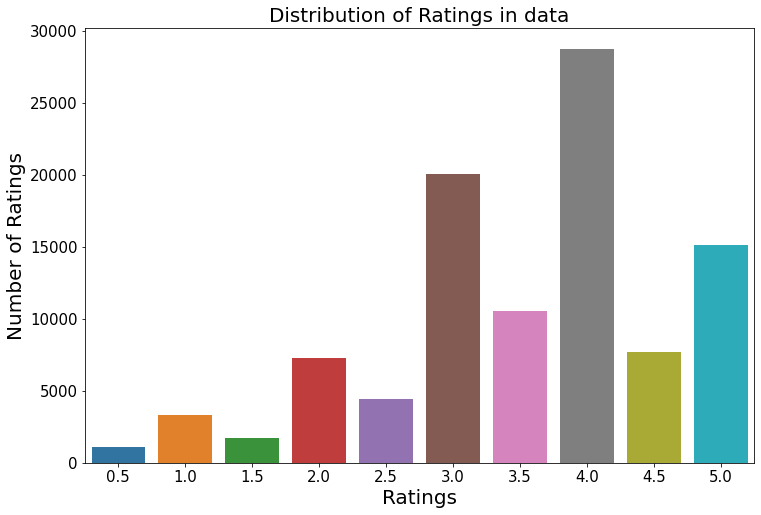

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (12, 8))
ax = sns.countplot(x="rating", data=ratings)
plt.tick_params(labelsize = 15)
plt.title("Distribution of Ratings in data", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

In [0]:
ratings["DayOfWeek"] = pd.to_datetime(ratings['timestamp'], unit='s').dt.day_name()
ratings.tail()

,userId,movieId,rating,timestamp,DayOfWeek
99999,671,6268,2.5,1065579370,Wednesday
100000,671,6269,4.0,1065149201,Friday
100001,671,6365,4.0,1070940363,Tuesday
100002,671,6385,2.5,1070979663,Tuesday
100003,671,6565,3.5,1074784724,Thursday


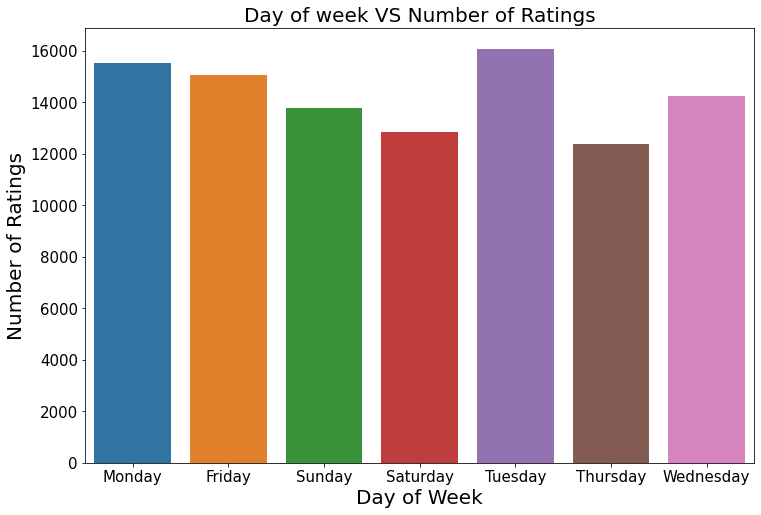

In [0]:
fig = plt.figure(figsize = (12, 8))

axes = sns.countplot(x = "DayOfWeek", data = ratings)
axes.set_title("Day of week VS Number of Ratings", fontsize = 20)
axes.set_xlabel("Day of Week", fontsize = 20)
axes.set_ylabel("Number of Ratings", fontsize = 20)
axes.tick_params(labelsize = 15)

plt.show()

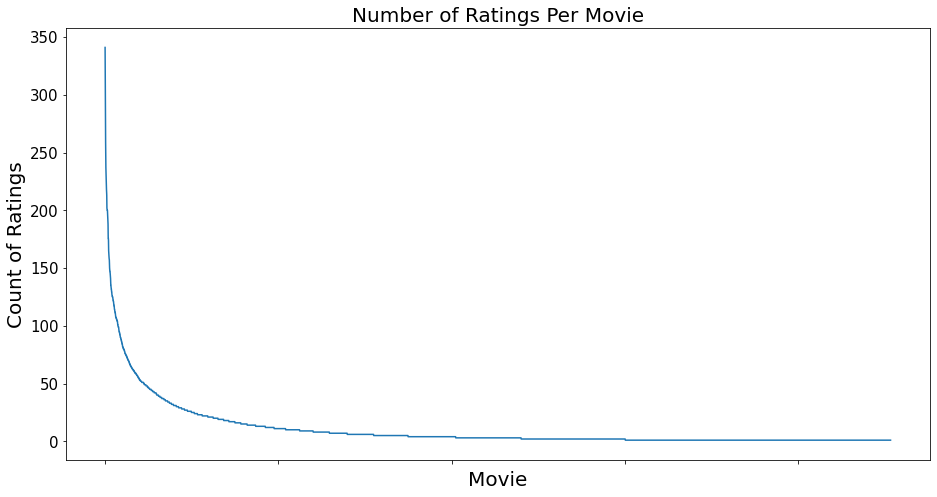

In [0]:
no_of_ratings_per_movie = ratings.groupby(by = "movieId")["rating"].count().sort_values(ascending = False)
fig = plt.figure(figsize = (12, 6))
axes = fig.add_axes([0.1,0.1,1,1])
plt.title("Number of Ratings Per Movie", fontsize = 20)
plt.xlabel("Movie", fontsize = 20)
plt.ylabel("Count of Ratings", fontsize = 20)
plt.plot(no_of_ratings_per_movie.values)
plt.tick_params(labelsize = 15)
axes.set_xticklabels([])
plt.show()

The plot positive skewed significantly. There are some far more popular movies which are watched and rated by many users as compared to other movies

**Movie released time**

In [0]:
import plotly.graph_objs as go
from plotly.offline import iplot

date = []
for i in df[~df.release_date.isna()]['release_date']:
    try:
        date.append(pd.to_datetime(i, format='%Y-%m-%d').year)
    except:
        pass
year = pd.Series(date).value_counts().sort_index()

trace = go.Scatter(x = year.index, y = year.values)
# Create layout
layout = dict(title = 'Number of Movies Released Throughout {} Years'.format(year.shape[0]),
              xaxis = dict(title = 'Release Year'),
              yaxis = dict(title = 'Number of Movies'))

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [0]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [0]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [0]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [0]:
df['day'] = df['release_date'].apply(get_day)
df['month'] = df['release_date'].apply(get_month)

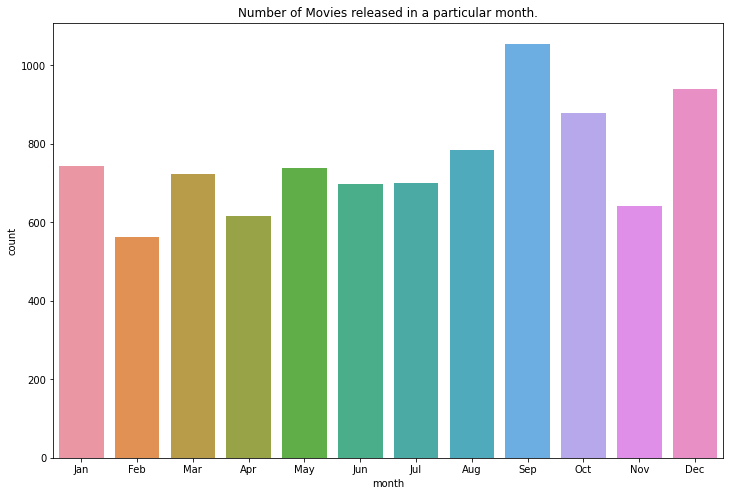

In [0]:
plt.figure(figsize=(12,8))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=df, order=month_order)

Movies appear to be realease mostly in January

[Text(0, 0.5, 'Revenue (USD in Hundred Millions'), Text(0.5, 0, 'Month')]

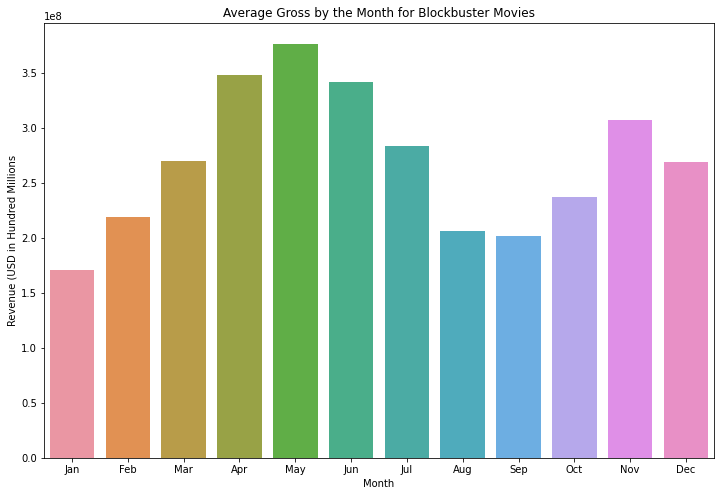

In [0]:
month_mean = pd.DataFrame(df[df['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,8))
plt.title("Average Gross by the Month for Blockbuster Movies")
ax = sns.barplot(x='mon', y='revenue', data=month_mean, order=month_order)
ax.set(ylabel="Revenue (USD in Hundred Millions", xlabel="Month")

Movies have the highest average gross among high grossing movies summer time due to the fact that blockbuster movies are usually released in the summer when the audience is more likely to spend their time and money on entertainment:kids are out of school and the parents are on vacation.

In [0]:
rate_year = pd.to_datetime(ratings['timestamp'], unit='s').dt.year.value_counts().sort_index()

trace = go.Scatter(x = rate_year.index, y = rate_year.values)
# Create layout
layout = dict(title = 'Number of Movies Ratings Throughout {} Years'.format(rate_year.shape[0]),
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Number of Movies Ratings'))

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

**Original** **Language**

In [0]:
languages = df['original_language'].value_counts().sort_values(ascending=False)[:10]

trace = go.Bar(x = languages.index, text = languages.values,
                   textposition = 'auto', y = languages.values)

layout = dict(title = 'Languages Used in Movies', xaxis = dict(title = 'Languages'),
              yaxis = dict(title = 'Count'))

  
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

**Title and Overview Wordclouds**

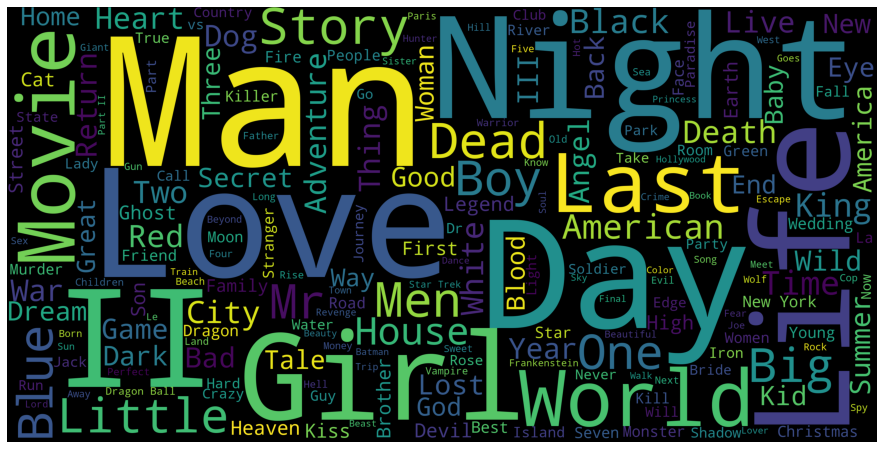

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=1500, width=3000 ).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

The word Girl, Day and Man are the most commonly occuring words. This might encapsulate the idea of the ubiquitious presence of romance in movies pretty well.

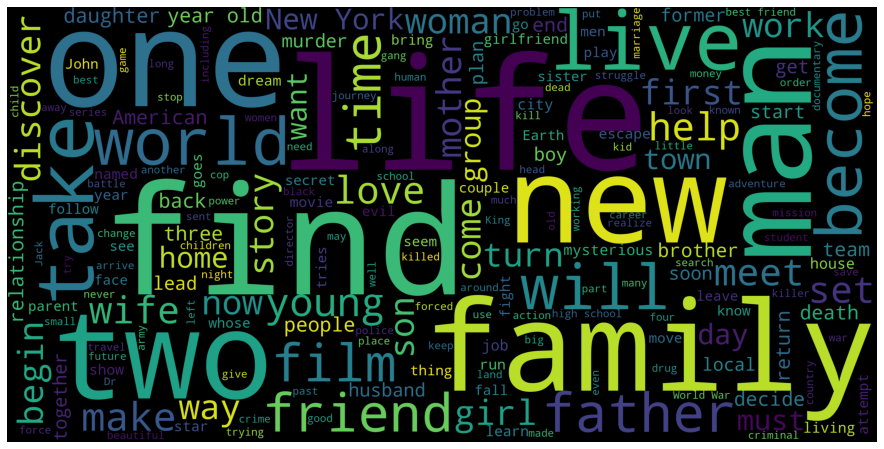

In [0]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=1500, width=3000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

Life is the most commonly used word in Movie titles. One, Family and Find are also popular in Movie Blurbs. These wordclouds give us a pretty good idea of the most popular themes present in movies.

**Popularity, Vote Average and Vote Count**

In [0]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [0]:
df['popularity'] = df['popularity'].apply(clean_numeric).astype('float')
df['vote_count'] = df['vote_count'].apply(clean_numeric).astype('float')
df['vote_average'] = df['vote_average'].apply(clean_numeric).astype('float')

In [0]:
df['popularity'].describe()

count    9075.000000
mean        7.277851
std         9.372905
min         0.000004
25%         2.961996
50%         6.428263
75%         9.865601
max       547.488298
Name: popularity, dtype: float64

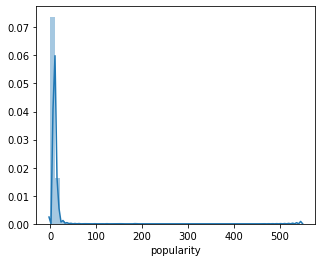

In [0]:
plt.figure(figsize = (5, 4))
sns.distplot(df['popularity'].fillna(df['popularity'].median()))
plt.show()

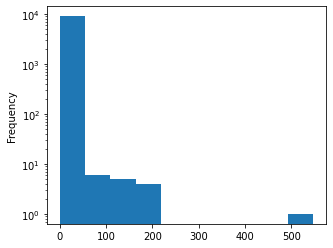

In [0]:
plt.figure(figsize = (5, 4))
df['popularity'].plot(logy=True, kind='hist')

*Most Popular Movies by Popularity Score*

In [0]:
df[['title', 'popularity']].sort_values('popularity', ascending=False).head(10)

,title,popularity
8945,Minions,547.488298
8720,Big Hero 6,213.849907
8808,Deadpool,187.860492
7441,Avatar,185.070892
8710,John Wick,183.870374
8641,Gone Girl,154.801009
8739,The Hunger Games: Mockingjay - Part 1,147.098006
8809,Captain America: Civil War,145.882135
266,Pulp Fiction,140.950236
6946,The Dark Knight,123.167259


*Most Voted on Movies*

In [0]:
df['vote_count'].describe()

count     9075.000000
mean       439.480771
std        996.435701
min          0.000000
25%         29.000000
50%         97.000000
75%        366.000000
max      14075.000000
Name: vote_count, dtype: float64

In [0]:
df[['title', 'vote_count']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count
7601,Inception,14075.0
6946,The Dark Knight,12269.0
7441,Avatar,12114.0
7914,The Avengers,12000.0
8808,Deadpool,11444.0
8552,Interstellar,11187.0
8247,Django Unchained,10297.0
8655,Guardians of the Galaxy,10014.0
2411,Fight Club,9678.0
7974,The Hunger Games,9634.0


In [0]:
df['vote_average'] = df['vote_average'].replace(0, np.nan)
df['vote_average'].describe()

count    9030.000000
mean        6.396235
std         0.930722
min         1.000000
25%         5.800000
50%         6.500000
75%         7.100000
max        10.000000
Name: vote_average, dtype: float64

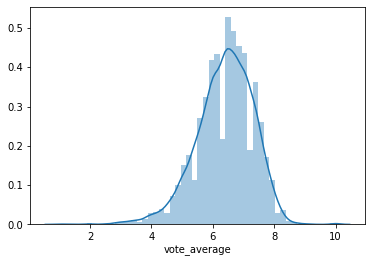

In [0]:
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))

*Most Critically Acclaimed Movies*

In [0]:
df[df['vote_count'] > 2000][['title', 'vote_average', 'vote_count']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count
732,The Godfather,8.5,6024.0
284,The Shawshank Redemption,8.5,8358.0
4266,Spirited Away,8.3,3968.0
1877,Life Is Beautiful,8.3,3643.0
472,Schindler's List,8.3,4436.0
8640,Whiplash,8.3,4376.0
2411,Fight Club,8.3,9678.0
1015,The Godfather: Part II,8.3,3418.0
1013,Psycho,8.3,2405.0
989,One Flew Over the Cuckoo's Nest,8.3,3001.0


*Popularity and Vote Average Relationship*

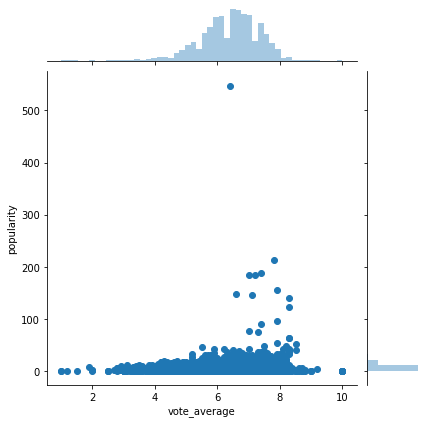

In [0]:
sns.jointplot(x='vote_average', y='popularity', data=df)

The Popularity and vote_average are not correlated at all

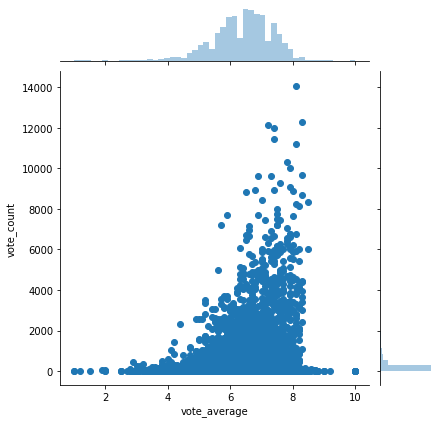

In [0]:
sns.jointplot(x='vote_average', y='vote_count', data=df)

There is small correlation between Vote_average and vote_count

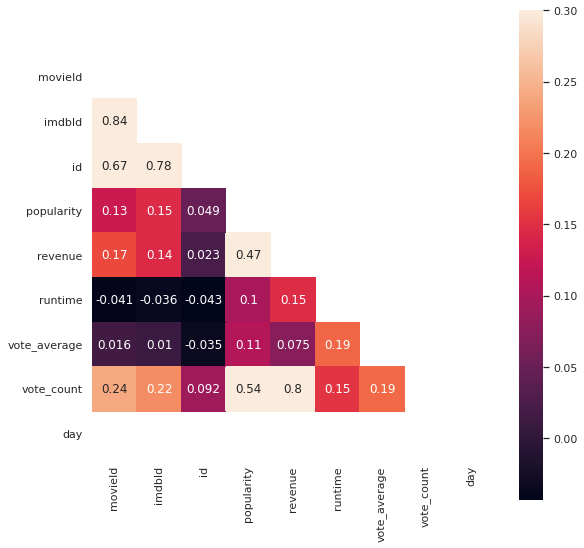

In [0]:
sns.set(font_scale=1)
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

In [0]:
!pip install scikit-surprise


     |████████████████████████████████| 6.5MB 2.7MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1673666 sha256=7788b7d29daa14843829762a5aaefcf96caff38683317656b8bf7d7629942d6f
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


## Error Metrics: 
In this notebook we will look at RMSE which helps to answer the question of how close the prediction ratings are to the true ratings. We evaluated four models through a 5-cross validation RMSE, where we train the model on 75% of the data and then test its accuracy on the remaining 25%.





## Predictive Modeling

#### Preparing library and data

In [0]:
from surprise import KNNBasic, BaselineOnly
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
import heapq
from collections import defaultdict
from surprise import accuracy
from surprise.model_selection import KFold
from matplotlib import cm
from surprise.model_selection import cross_validate


In [0]:
metadata2 = metadata[['id', 'title']]
metadata2.dropna(inplace=True)
metadata2.id = metadata2.id.map(int)
dat = ratings.set_index('movieId').join(movies.set_index('movieId')).reset_index().set_index('id').join(metadata2.set_index('id')).dropna().reset_index()
dat = dat.drop(columns=['movieId', 'imdbId', 'timestamp'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Basic algorithms

### BaselineOnly

We start off with basic algorithm which is still useful for comparing accuracies. Our group choose BaselineOnly algorithm which will account for the mean rating given by the user and the mean of the movies. 
<br> <br>
r^ui = μ+bu+bi
<br> <br>
μ: Average Global Ratings in training data <br>
bu: User-Bias <br>
bi: Item-Bias <br>

More detail of function, please check at https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#baseline-estimates-configuration

#### Parameter Optimization

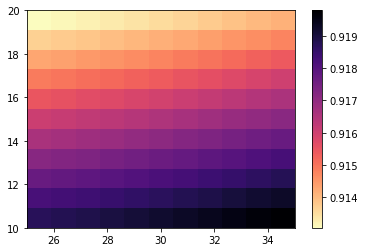

In [0]:
def find_lambda(n_epochs, list1, list2):
    RMSE = []
    lamb2 = []
    lamb3 = []
    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(dat[['userId', 'title', 'rating']], reader)
    trainset, testset = train_test_split(data, test_size=.25, random_state=1) 

    for i in list1:
      for u in list2:
        bsl_options = {'method': 'als', 'n_epochs': n_epochs, 'reg_u': u, 'reg_i': i}
        algo = BaselineOnly(bsl_options=bsl_options, verbose=False)
        algo.fit(trainset)
        predictions = algo.test(testset, verbose=False)

        lamb2.append(i)
        lamb3.append(u)
        RMSE.append(accuracy.rmse(predictions, verbose=False))
    
    # Graph
    lamb2 = np.array(lamb2)
    lamb3 = np.array(lamb3)
    RMSE = np.array(RMSE)

    N = int(len(RMSE)**.5)
    RMSE = RMSE.reshape(N, N)
    plt.imshow(RMSE, extent=(np.amin(lamb2), np.amax(lamb2), np.amin(lamb3), np.amax(lamb3)), cmap="magma_r", aspect = 'auto')
    plt.colorbar()
    plt.show()

find_lambda(n_epochs=100, list1=list(range(25, 36)), list2=list(range(10, 21)))      


#####We'll proceed the BaselineOnly model with reg_u = 20 and reg_i = 25

In [0]:
def blmodel(uid, iid):
    
    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(dat[['userId', 'title', 'rating']], reader)
    trainset, testset = train_test_split(data, test_size=.25, random_state=1)
    test_df = pd.DataFrame(testset)
    test_df.columns = ['userId', 'title', 'rating']
    merged = ratings.merge(test_df, indicator=True, how='outer')
    trainset = Dataset.load_from_df(merged[merged['_merge'] == 'left_only'][['userId', 'title', 'rating']],reader)
    trainset = trainset.build_full_trainset()
    

    algo = BaselineOnly(bsl_options = {'method': 'als', 'n_epochs': 100, 'reg_u': 20, 'reg_i': 25}, verbose=False)
    
    # train and test algorithm.
    algo.fit(trainset)
    prediction = algo.predict(uid, iid, verbose = False)
    trainset = Dataset.load_from_df(merged[merged['_merge'] == 'left_only'][['userId', 'title', 'rating']],reader)
    cv_results = cross_validate(algo, trainset, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    mean_rmse = cv_results['test_rmse'].mean()

    return prediction, mean_rmse
prediction, mean_rmse = blmodel(uid = 12, iid = "Toy Story")

Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3243  1.3097  1.2889  1.3651  1.2372  1.3050  0.0421  
MAE (testset)     1.1461  1.1341  1.1028  1.1673  1.0575  1.1216  0.0382  
Fit time          0.01    0.01    0.01    0.01    0.01    0.01    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


In [0]:
mean_rmse

1.305034281711899

We get an RMSE of 1.305 for baseline model. 

## K-NN Algorithms

Next we will explore k-nearest neighbor collaborative filtering methods which calculate the similarity betwen users/items.

### KNN - User-based Collaborative Filtering

For detail algorithm, please check at https://surprise.readthedocs.io/en/stable/knn_inspired.html

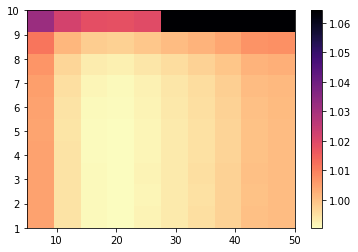

In [0]:
def graph_for_k(lst1, lst2, sim_options):
    RMSE = []
    max_k = []
    min_k = []

    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(dat[['userId', 'title', 'rating']], reader)
    
    trainset, testset = train_test_split(data, test_size=.25, random_state=1) 
    for i in lst1:
      for j in lst2:
        algo = KNNBasic(k = i, min_k = j, sim_options=sim_options, verbose=False)
        algo.fit(trainset)
        predictions = algo.test(testset, verbose=False)

        max_k.append(i)
        min_k.append(j)
        RMSE.append(accuracy.rmse(predictions, verbose=False))
      
    # Graph
    max_k = np.array(max_k)
    min_k = np.array(min_k)
    RMSE = np.array(RMSE)

    N = int(len(RMSE)**.5)
    RMSE = RMSE.reshape(N, N)
    plt.imshow(RMSE, extent=(np.amin(max_k), np.amax(max_k), np.amin(min_k), np.amax(min_k)), cmap="magma_r", aspect = 'auto')
    plt.colorbar()
    plt.show()
    
graph_for_k(list(range(5, 55, 5)), list(range(1, 11)), sim_options={'name': 'pearson_baseline', 'user_based': True})

#### From the heatmap plot, we can see the RMSE score is lowest at max_k = 15 and min_k = [1, 2, 3, 4]. We'll then apply the above parameters to our model.

In [0]:
def get_top_n(predictions, neighbors, n=10):
    # First map the predictions to each user.
    byUser = defaultdict(list)
    for p in predictions:
        byUser[p.uid].append(p)
    
    # For each user, reduce predictions to top-n
    for (uid, userPredictions) in zip(neighbors, [byUser[neighbor] for neighbor in neighbors]):
        byUser[uid] = heapq.nlargest(n, userPredictions, key=lambda p: p.est)
      
    newdict = {uid: byUser[uid] for uid in neighbors}
    return newdict

def knn_model(iid, k):

   reader = Reader(rating_scale=(1, 5))
   data = Dataset.load_from_df(dat[['userId', 'title', 'rating']], reader)

   ## User-based filtering
   algo = KNNBasic(k = 15, min_k = 3, sim_options= {'name': 'pearson_baseline', 'user_based': True}, verbose=False)
    
   # cross validate
   cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
   mean_rmse = cv_results['test_rmse'].mean()
   print('The mean RMSE for this model is', mean_rmse)

   # build from full data
   data = Dataset.load_from_df(dat[['userId', 'title', 'rating']], reader)
   trainset = data.build_full_trainset()
   algo.fit(trainset)
   predictions = algo.test(trainset.build_testset(), verbose=False)
   neighbors = algo.get_neighbors(iid, k)
   print("Top nearest neighbors to user number {} are:".format(iid))
   for i in neighbors:
     print(i)

   top_n = get_top_n(predictions, neighbors, n=4)
   # Print the recommended items for each user
   print()
   print('Top-4 recommended items of each user')
   for uid, user_ratings in list(top_n.items())[:10]:
     print('User {}'.format(uid))
     for prediction in user_ratings:
       print('  Item {0.iid} ({0.est:.2f})'.format(prediction), end='')
       print()
   print()

knn_model(iid = 12, k=10)

Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9846  0.9821  0.9875  0.9946  0.9882  0.9874  0.0042  
MAE (testset)     0.7652  0.7620  0.7674  0.7699  0.7669  0.7663  0.0026  
Fit time          0.49    0.53    0.52    0.51    0.48    0.51    0.02    
Test time         1.14    1.21    1.14    1.13    1.21    1.17    0.04    
The mean RMSE for this model is 0.9874078268483931
Top nearest neighbors to user number 12 are:
108
109
28
39
247
351
99
62
292
3

Top-4 recommended items of each user
User 108
  Item The Lion King (4.71)
  Item Beauty and the Beast (4.64)
  Item The Silence of the Lambs (4.58)
  Item Star Trek: Generations (4.52)
User 109
  Item Se7en (4.89)
  Item The Silence of the Lambs (4.75)
  Item The Shawshank Redemption (4.75)
  Item Pulp Fiction (4.52)
User 28
  Item On the Waterfront (4.98)
  Item The Philadelphia Story (4.95)
  Item The Crucible (4.91)
  Item Lifeb

### KNN - Item-based Collaborative Filtering

In [0]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
import heapq
from collections import defaultdict
from surprise.model_selection import cross_validate

In [0]:
ratings = pd.merge(df,ratings, on ='movieId', how='inner')

In [0]:
ratings.shape

(100063, 29)

In [0]:
# Drop null values
ratings = ratings.dropna(subset=['userId', 'title', 'rating'])

In [0]:
ratings.shape

(99850, 29)

In [0]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'title', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=1)

In [0]:
test_df = pd.DataFrame(testset)
test_df.columns = ['userId', 'title', 'rating']

In [0]:
merged = ratings.merge(test_df, indicator=True, how='outer')
trainset = Dataset.load_from_df(merged[merged['_merge'] == 'left_only'][['userId', 'title', 'rating']],reader)
trainset = trainset.build_full_trainset()

#### Parameter Optimization

In [0]:
import surprise
def RMSECal(data, k=5):
    sim_options = {'name': 'cosine', 'user_based': False}
    algo = KNNBasic(k=k, sim_options=sim_options)
    trainset, testset = train_test_split(data, test_size=0.25, random_state=1)
    algo.fit(trainset)
    predictions = algo.test(testset)
    rmse = surprise.accuracy.rmse(predictions, verbose=True)
    return rmse

In [0]:
ranges = range(100, 900, 100)
rmse_list = [RMSECal(data, k=i) for i in ranges]

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9761
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9698
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9681
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9675
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9678
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9678
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9679
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9682


Text(0, 0.5, 'RMSE')

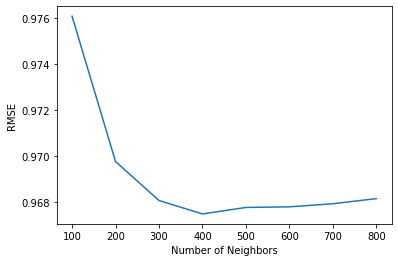

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(ranges, rmse_list)
plt.xlabel('Number of Neighbors')  
plt.ylabel('RMSE')

From the graph above, we notice the optimal
number of nearest neighbors is K = 400. With this particular choice of K, the RMSE of test data is 0.9675.

In [0]:
sim_options = {'name': 'cosine', 'user_based': False} # False of Item-based Collaborative Filtering
algo = KNNBasic(k=400, sim_options=sim_options)
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [0]:
trainset.all_items()

range(0, 7982)

In [0]:
def get_n_neighbors(i, n): # i: the index of the item range from 0 to 7982, n: number of neighbors/recommended items for item i
    return trainset.to_raw_iid(i), [trainset.to_raw_iid(ii) for ii in algo.get_neighbors(i, n)]

In [0]:
# Recommendations for item 100 in the trainset
get_n_neighbors(1000, 5)

('Cool Hand Luke',
 ['Waiting to Exhale',
  'Dracula: Dead and Loving It',
  'Cutthroat Island',
  'It Takes Two',
  'Richard III'])

In [0]:
# Evaluate the RMSE and MSE
trainset = Dataset.load_from_df(merged[merged['_merge'] == 'left_only'][['userId', 'title', 'rating']],reader)

In [0]:
trainset.df.title.unique().shape 

(7982,)

In [0]:
cv_result = cross_validate(algo,trainset,measures=['RMSE','MAE'],verbose=1)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9775  0.9668  0.9844  0.9755  0.9713  0.9751  0.0059  
MAE (testset)     0.7553  0.7500  0.7605  0.7547  0.7540  0.7549  0.0034  
Fit time          9.39    9.19    9.35    9.17    9.34    9.29    0.09    
Test time         6.51    6.62    6.49    6.52    6.63    6.55    0.06    


In [0]:
print('The mean RMSE for this model is ',cv_result['test_rmse'].mean())

The mean RMSE for this model is  0.9751256267096797


The RMSE for item-based CF (0.975) is lower than the RMSE for user-based CF (0.9874) and baseline (1.305), meaning we made a minor improvement. 

## Shortcomings of Collaborative Filtering
- popularity bias: The system is biased towards movies that have the most user interaction (i.e. ratings).
- item cold-start problem: When a new movie is added to the list, it has a lot less user interaction and thus will rarely occur as a recommendation.
- scalability: The issue of managing a movie-user dataset matrix as the count of users and movies increase.

We will look into Matrix Factorization to solve for these problems. <br>
For detail, please check at https://surprise.readthedocs.io/en/stable/matrix_factorization.html

### Matrix Factorization-based algorithm

In [0]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

In [0]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'title', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.25, random_state=5)

In [0]:
test_df = pd.DataFrame(testset)
test_df.columns = ['userId', 'title', 'rating']

In [0]:
merged = ratings.merge(test_df, indicator=True, how='outer')
trainset = Dataset.load_from_df(merged[merged['_merge'] == 'left_only'][['userId', 'title', 'rating']],reader)
trainset = trainset.build_full_trainset()

In [0]:
algo = SVD(n_factors=160, n_epochs=100, lr_all=0.005, reg_all=0.1)
algo.fit(trainset)
test_pred = algo.test(testset)
print("SVD : Test Set")
accuracy.rmse(test_pred, verbose=True)
accuracy.mae(test_pred, verbose=True)

SVD : Test Set
RMSE: 0.8815
MAE:  0.6767


0.6767137926607665

In [0]:
trainset = Dataset.load_from_df(merged[merged['_merge'] == 'left_only'][['userId', 'title', 'rating']],reader)

In [0]:
cv_result = cross_validate(algo,trainset,measures=['RMSE','MAE'],verbose=1)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8843  0.8857  0.8854  0.8881  0.8863  0.8860  0.0012  
MAE (testset)     0.6843  0.6809  0.6811  0.6808  0.6813  0.6817  0.0013  
Fit time          25.95   26.05   25.93   26.20   26.37   26.10   0.17    
Test time         0.11    0.11    0.11    0.20    0.11    0.13    0.04    


In [0]:
print('The mean RMSE for this model is ',cv_result['test_rmse'].mean())

The mean RMSE for this model is  0.8878713787981691


## Conclusion

Our Best Model is SVD with least test RMSE 0.888 and RMSE on the test set of 0.881